In [2]:
%pylab inline
import pandas as pd
import seaborn as sns
sns.set_style('white')

df = pd.read_csv('/Users/akeshavan/Downloads/OHBM BrainHack Preliminary Survey (Responses) - Form Responses 1.csv')

Populating the interactive namespace from numpy and matplotlib


In [5]:
df.columns

Index(['Timestamp', 'How did you hear about this event?',
       'What is your position/job title?',
       'Are you considering pitching a project at the event?',
       'What is your Slack handle on the Brainhack Slack?',
       'What portion of your time are you planning to spend on each track of the hackathon?',
       'Which sessions in the TrainTrack are you interested in attending?'],
      dtype='object')

In [9]:
data = df.groupby('What is your position/job title?').apply(lambda x: x.count()[['Timestamp']])

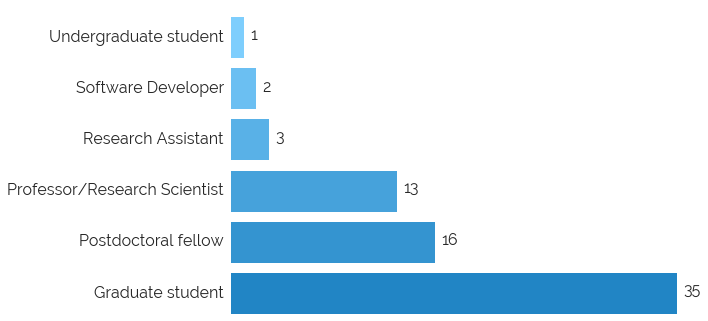

In [70]:
from matplotlib.font_manager import FontProperties
import matplotlib.font_manager as fm


def make_bar(data):
    colors = sns.blend_palette(["#2185c5", "#7ecefd"], data.shape[0])

    fig, ax = subplots(1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    #ax.spines['bottom'].set_color('lightgrey')
    #ax.spines['left'].set_color('lightgrey')
    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    ax.set_xticks([])

    fn = 'Raleway' #'Comic Sans MS'

    prop = fm.FontProperties(fname='/Users/akeshavan/Downloads/Raleway-Regular.ttf')
    prop.set_size(16)

    ax.barh(arange(data.shape[0]), data['Timestamp'], color=colors, linewidth=0)
    ax.set_yticks(arange(data.shape[0]) + 0.4);
    ax.set_yticklabels(data.index, fontproperties=prop);

    for i, d in enumerate(data['Timestamp'].values):
        ax.text(d+0.5,i+0.35, d, fontproperties=prop)
    return fig

fig = make_bar(data)
savefig('/Users/akeshavan/Desktop/participants.png', bbox_inches='tight')

In [89]:
data2 = {}
vals = [q.split(',') for q in df['How did you hear about this event?'].values]
for v in vals:
    for c in v:
        if not c.lstrip() in data2:
            data2[c.lstrip()] = 1
        else:
            data2[c.lstrip()] += 1
data2 = pd.DataFrame(pd.Series(data2), columns=['Timestamp'])
data2.sort_values('Timestamp', inplace=True)

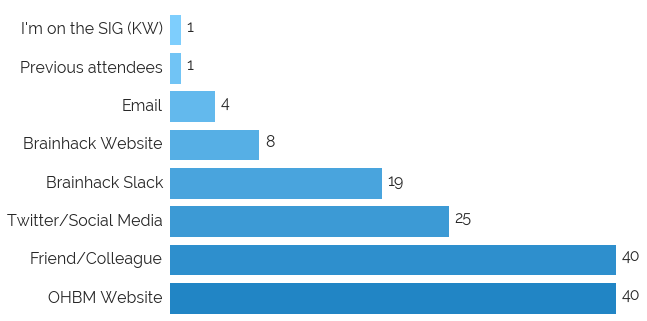

In [92]:
fig = make_bar(data2[::-1])
savefig('/Users/akeshavan/Desktop/howyouheard.png', bbox_inches='tight')

In [97]:
data3 = df.groupby('What portion of your time are you planning to spend on each track of the hackathon?')\
.apply(lambda x: x.count()[['Timestamp']])

In [111]:
def make_barv(data):
    colors = sns.blend_palette(["#7ecefd", "#2185c5"], data.shape[0])

    fig, ax = subplots(1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    #ax.spines['bottom'].set_color('lightgrey')
    #ax.spines['left'].set_color('lightgrey')
    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    ax.set_yticks([])

    fn = 'Raleway' #'Comic Sans MS'

    prop = fm.FontProperties(fname='/Users/akeshavan/Downloads/Raleway-Regular.ttf')
    prop.set_size(16)

    ax.bar(arange(data.shape[0]), data['Timestamp'], color=colors, linewidth=0)
    ax.set_xticks(np.array([0,9]) + 0.4);
    ax.set_xticklabels(['0%','100%'], fontproperties=prop);
    
    for i, d in enumerate(data['Timestamp'].values):
        ax.text(i+0.35, d+0.5, d, fontproperties=prop)
    return fig, ax

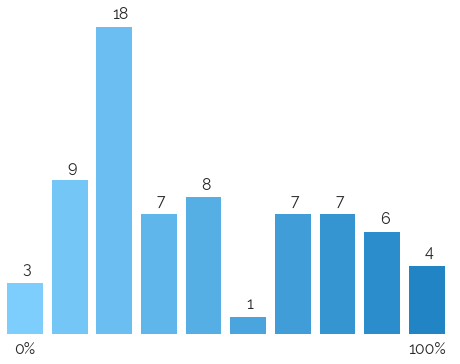

In [113]:
fig, ax = make_barv(data3)
prop = fm.FontProperties(fname='/Users/akeshavan/Downloads/Raleway-Regular.ttf')
prop.set_size(16)
#ax.set_xlabel("Planned time at the TrainTrack", fontproperties=prop);
savefig('/Users/akeshavan/Desktop/tt_time.png', bbox_inches='tight')